In [16]:
ignore_warnings = True
import numpy as np                                            
import pandas as pd                                           
import matplotlib.pyplot as plt                              
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) 
from scipy import stats                                       
import seaborn as sns

plt.rc('axes', axisbelow=True)                                
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
from IPython.utils import io                                  
cmap = plt.cm.inferno     

In [9]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

In [10]:
df = pd.read_csv("sample.csv")
print(df.iloc[0:5,])
df.head(n=13)

       X      Y  Facies  Porosity       Perm           AI
0  100.0  900.0     1.0  0.100187   1.363890  5110.699751
1  100.0  800.0     0.0  0.107947  12.576845  4671.458560
2  100.0  700.0     0.0  0.085357   5.984520  6127.548006
3  100.0  600.0     0.0  0.108460   2.446678  5201.637996
4  100.0  500.0     0.0  0.102468   1.952264  3835.270322


,X,Y,Facies,Porosity,Perm,AI
0,100.0,900.0,1.0,0.100187,1.363890,5110.699751
1,100.0,800.0,0.0,0.107947,12.576845,4671.458560
2,100.0,700.0,0.0,0.085357,5.984520,6127.548006
3,100.0,600.0,0.0,0.108460,2.446678,5201.637996
4,100.0,500.0,0.0,0.102468,1.952264,3835.270322
5,100.0,400.0,0.0,0.110579,3.691908,5295.267191
6,100.0,300.0,0.0,0.088936,1.073582,6744.996106
7,100.0,200.0,0.0,0.102094,2.396189,5947.338115
8,100.0,100.0,1.0,0.137453,5.727603,5823.241783
9,200.0,900.0,1.0,0.137062,14.771314,5621.146994


In [11]:
df.describe()

,X,Y,Facies,Porosity,Perm,AI
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,629.823755,488.344828,0.620690,0.150357,183.711554,4203.657220
std,341.200403,166.669352,0.486148,0.049783,344.959449,1317.753146
min,40.000000,29.000000,0.000000,0.058871,0.033611,1844.166880
25%,241.000000,416.000000,0.000000,0.104893,2.186525,2947.867713
50%,700.000000,479.000000,1.000000,0.137062,19.977020,4204.150893
75%,955.000000,539.000000,1.000000,0.199108,246.215865,5397.400218
max,1005.000000,989.000000,1.000000,0.242298,2642.999829,7881.898531


In [147]:
min_porosity = df["Porosity"].values.min()
max_porosity = df["Porosity"].values.max()
weights=np.ones(len(df))/len(df)


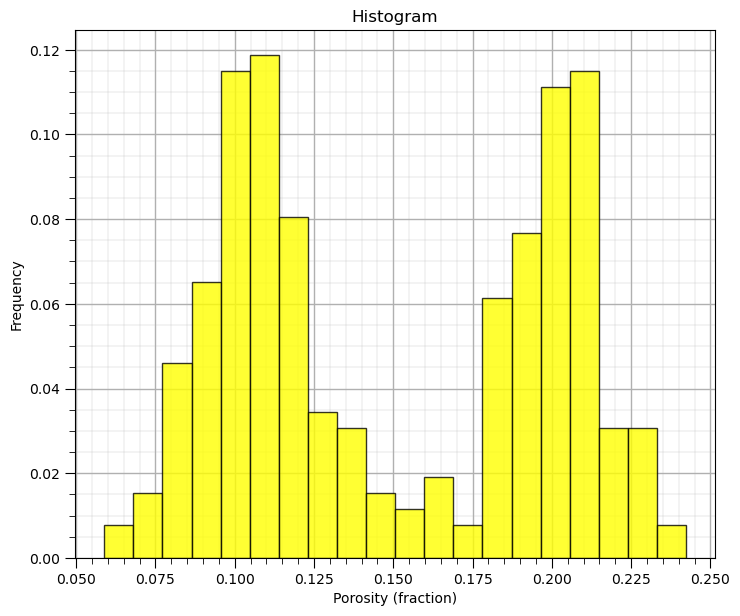

In [148]:
plt.hist(df["Porosity"].values,alpha=0.8,color="yellow",edgecolor="black",bins=20,range=[min_porosity,max_porosity],weights=weights)
plt.title('Histogram'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Frequency"); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.1, hspace=0.2); plt.show()

In [146]:
np.ones(len(df))/len(df)
np.arange(5)/4
weights=np.ones(len(df))/len(df)
print(weights)

[0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142
 0.00383142 0.00383142 0.00383142 0.00383142 0.00383142 0.0038

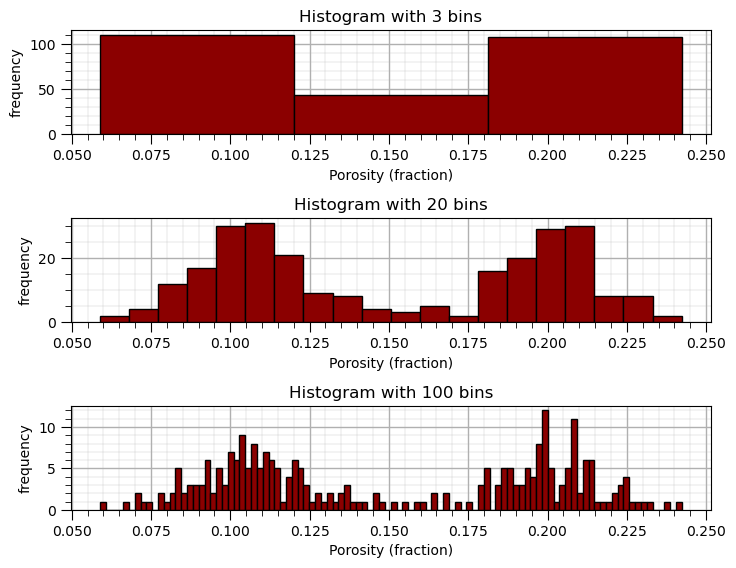

In [133]:
bin_numbers = [3,20,100]
for i, bin_number in enumerate(bin_numbers):
    plt.subplot(3,1,i+1)
    plt.hist(df['Porosity'].values,range=[min_porosity,max_porosity],bins=bin_number,color="darkred",edgecolor="black",weights=None,cumulative=False,log=False)
    plt.xlabel("Porosity (fraction)");plt.ylabel("frequency")
    plt.title(f"Histogram with {bin_number} bins")
    add_grid()
    plt.subplots_adjust(left=0.0,bottom=0,right=1,top=1,wspace=2,hspace=.8)
    

In [150]:
def hist_easyplot(values,value_range,bin_no,xlabel,ylabel,title,color="blue",edgecolor="black",cumulative=False,log=False,weights=None,):
    # function definition for easier plotting of histograms
    plt.hist(values,bins=bin_no,color=color,edgecolor=edgecolor,range=value_range,log=log,weights=weights,cumulative=cumulative)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    add_grid()

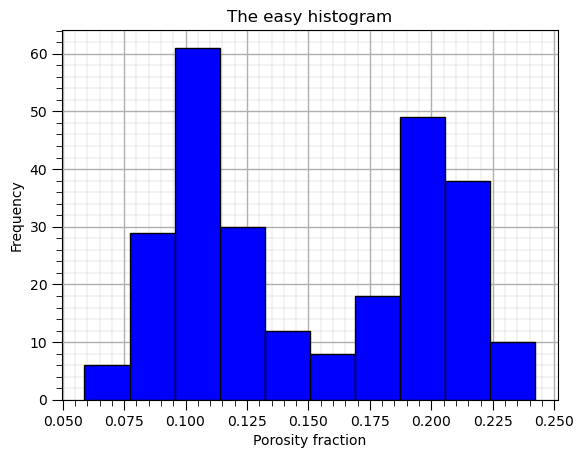

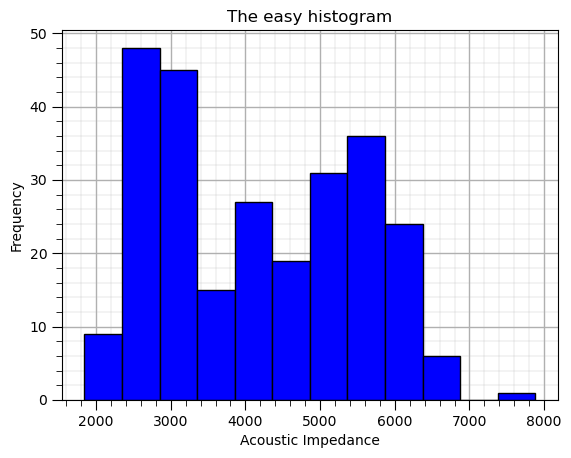

In [149]:
hist_easyplot(df['Porosity'].values,bin_no=10,xlabel="Porosity fraction",ylabel="Frequency",
          title="The easy histogram",value_range=[min_porosity,max_porosity])
plt.show()
hist_easyplot(df['AI'].values,bin_no=12,xlabel="Acoustic Impedance",ylabel="Frequency",
          title="The easy histogram",value_range=[df['AI'].min(),df['AI'].max()])
plt.show()



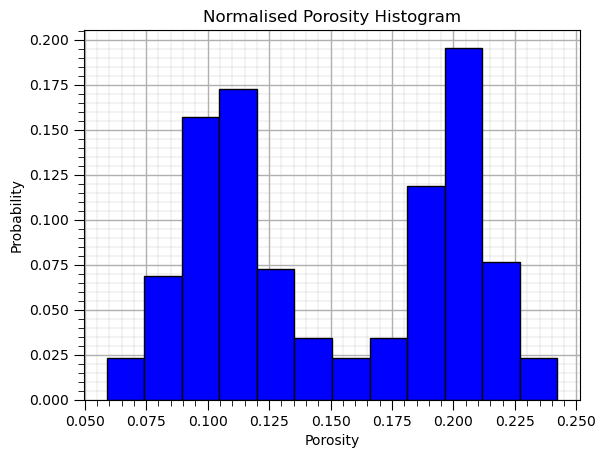

In [151]:
# normalized histogram
hist_easyplot(df['Porosity'].values,bin_no=12,xlabel="Porosity",ylabel="Probability",
          title="Normalised Porosity Histogram",value_range=[min_porosity,max_porosity],weights=np.ones(len(df))/len(df))

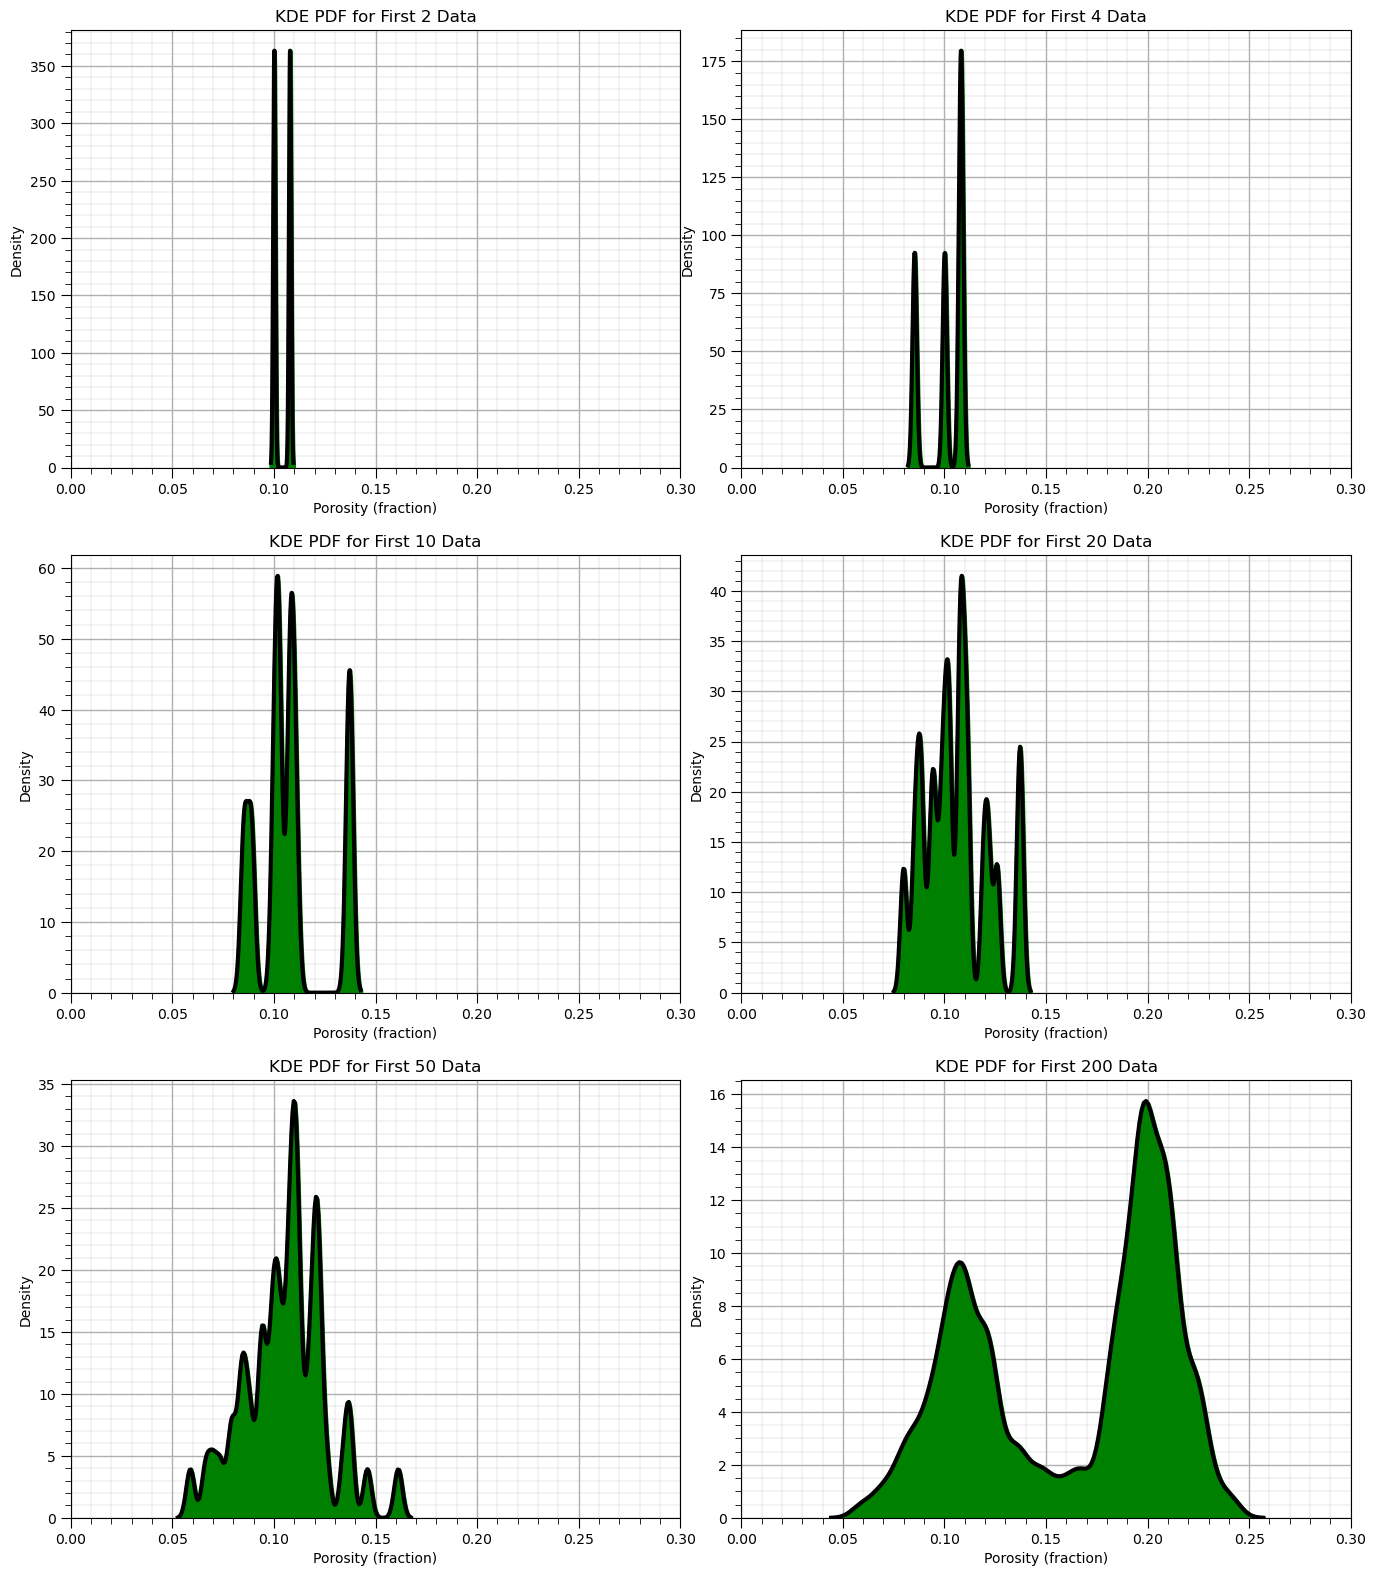

In [162]:
nums=[2,4,10,20,50,200]
for i,num in enumerate(nums):
    plt.subplot(3,2,i+1)
    sns.kdeplot(x=df['Porosity'].values[:num],color = 'black',alpha = 1.0,linewidth=3,bw_method=0.1,fill=False,zorder=10)
    sns.kdeplot(x=df['Porosity'].values[:num],color = 'green',alpha = 1.0,linewidth=3,bw_method=0.1,fill=True,zorder=1)
    plt.xlim([0,0.30])
    add_grid()
    plt.title('KDE PDF for First ' + str(num) + ' Data'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Density")
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.1, wspace=0.1, hspace=0.2); plt.show()

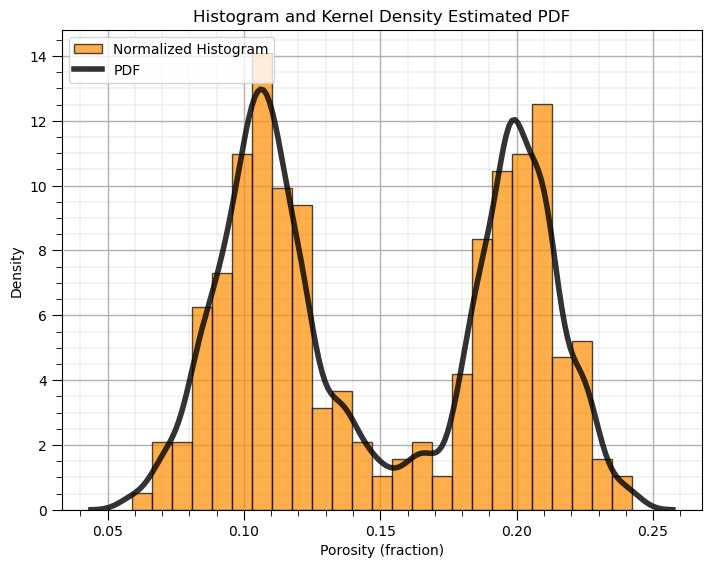

Band Width = 0.01, bandwidth x standard deviation = 0.0004968730570602708
Band Width = 0.05, bandwidth x standard deviation = 0.0024843652853013543
Band Width = 0.1, bandwidth x standard deviation = 0.0049687305706027085
Band Width = 0.3, bandwidth x standard deviation = 0.014906191711808122


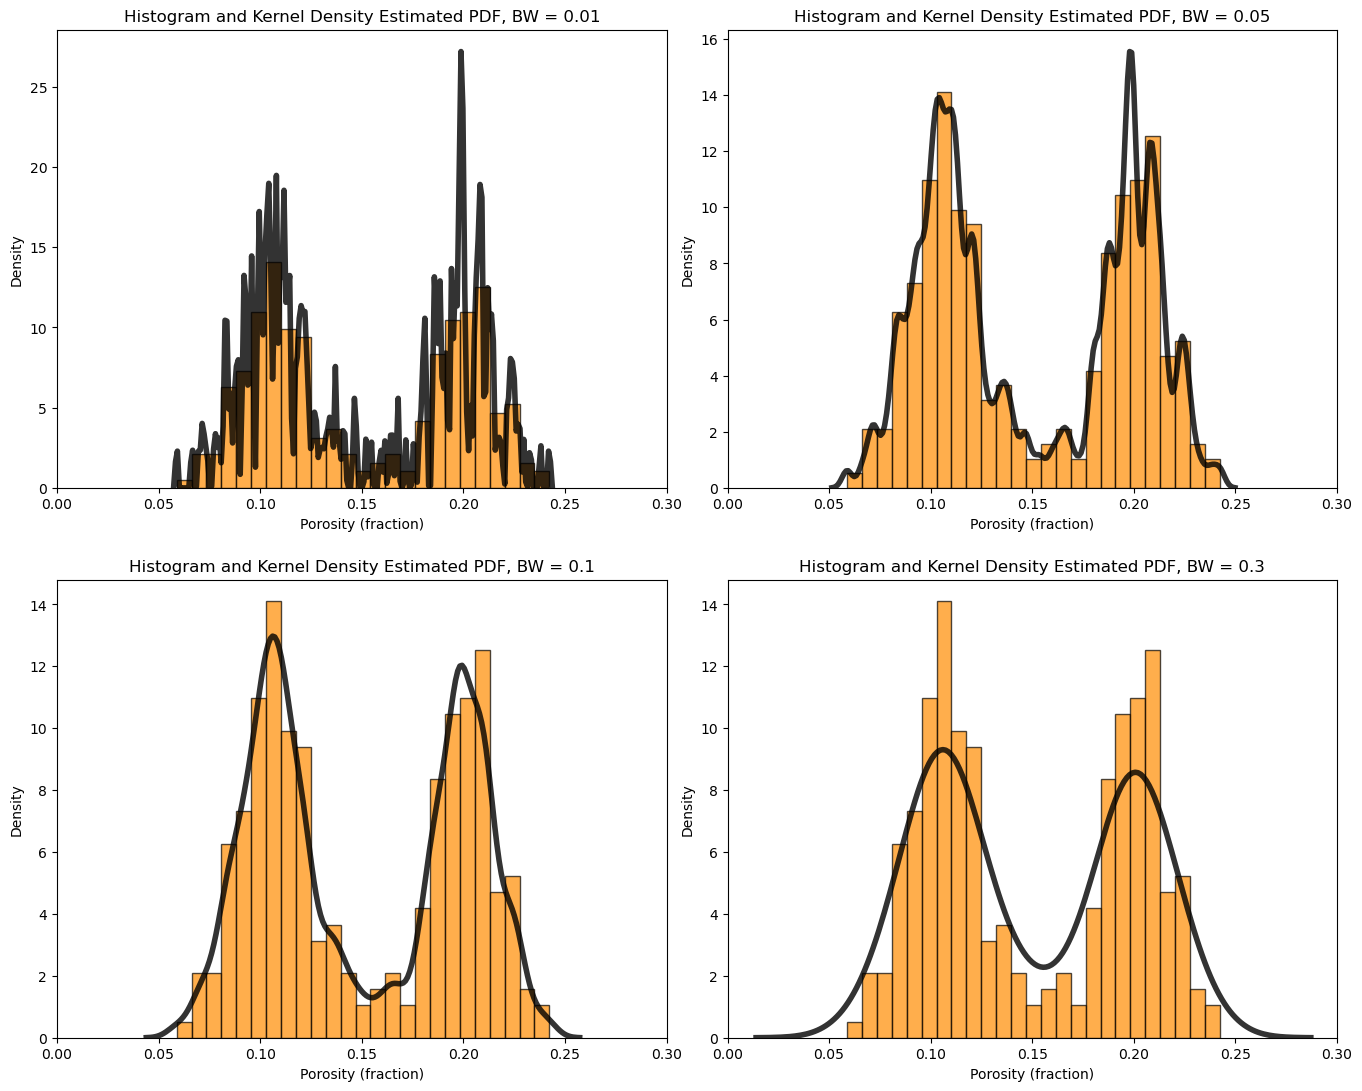

In [171]:
plt.hist(df['Porosity'].values,alpha=0.7,color="darkorange",edgecolor="black",bins=25,range=[min_porosity,max_porosity],density=True,
         label = 'Normalized Histogram')
sns.kdeplot(x=df['Porosity'].values,color = 'black',alpha = 0.8,linewidth=4.0,bw_method=0.10,label = 'PDF')
plt.title('Histogram and Kernel Density Estimated PDF'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Density")
plt.legend(loc='upper left'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.2) 
plt.show()
for i, bw in enumerate([0.01,0.05,0.1,0.3]):
    plt.subplot(2,2,i+1)
    print(r'Band Width = ' + str(bw) + r', bandwidth x standard deviation = ' + str(bw*np.std(df['Porosity'])) )
    plt.hist(df['Porosity'].values,alpha=0.7,color="darkorange",edgecolor="black",bins=25,range=[min_porosity,max_porosity],density=True)
    sns.kdeplot(x=df['Porosity'].values,color = 'black',alpha = 0.8,linewidth=4.0,bw_method=bw)
    plt.xlim([0.0,0.3])
    plt.title('Histogram and Kernel Density Estimated PDF, BW = ' + str(bw)); plt.xlabel('Porosity (fraction)'); plt.ylabel("Density")

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.1, hspace=0.2)
plt.show()

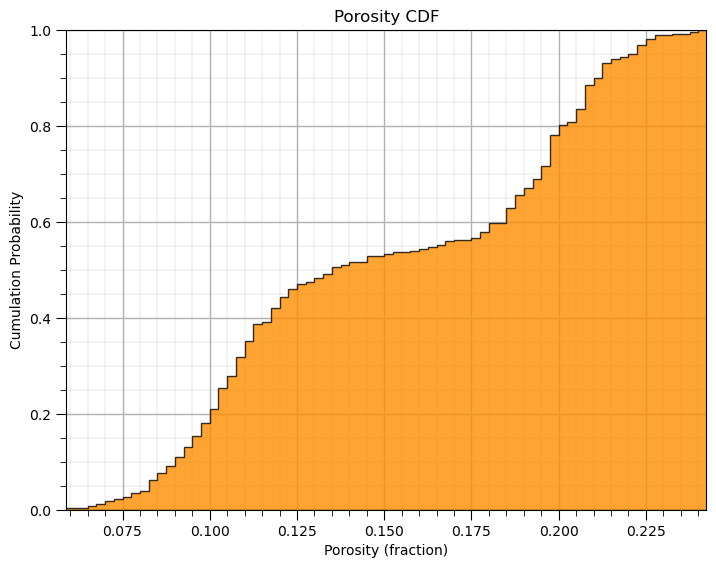

In [182]:
plt.hist(df['Porosity'].values,density=True, cumulative=True, label='CDF',
           histtype='stepfilled', alpha=0.8, bins = 100, color='darkorange', edgecolor = 'black', range=[0.0,0.25])
plt.xlabel('Porosity (fraction)'); plt.title('Porosity CDF'); plt.ylabel('Cumulation Probability'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.2); plt.xlim([min_porosity,max_porosity]); plt.ylim([0,1])
plt.show()